c:\Users\Jonathan.Reasoner\Documents\active_inference_playground\aif_multi_robot/


<module 'aif_functions_aif_ep' from 'c:\\Users\\Jonathan.Reasoner\\Documents\\active_inference_playground\\aif_multi_robot\\aif_functions_aif_ep.py'>

c:\Users\Jonathan.Reasoner\Documents\active_inference_playground\aif_multi_robot/
Initial Prior:  [0.33333333 0.33333333 0.33333333]
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1
Selected Goal for  1  is  0
Selected Goal for  0  is  1

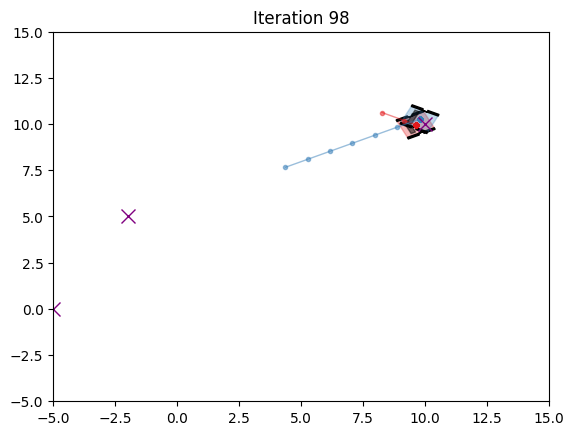

In [71]:
%reset -f 
%matplotlib inline
import importlib
import numpy as np
from matplotlib.animation import FuncAnimation
import os
from datetime import datetime
from IPython.display import HTML, display
import aif_functions_aif_ep as aif


pwd = os.path.abspath('') + "/"
print(pwd)
importlib.reload(aif)# Re-define the environment and simulation parameters here
interactive = True  # Set to True to display the animation in the notebook
args = {}
random_seed = 3  # Random seed #2,5,6 are interesting; 6 diverges, 2 & 5 converges ---- 6 is the best for our scenario ->
# 6 is the best for the following reasons:
# If any agent except the third agent is type B, then the agents converge to the correct goal
# If the third agent is type B, the agents are unable to converge to the same goal
np.random.seed(random_seed)  # Set random seed
# Set random goals
env_size = 15  # Environment size
num_goals = 3  # Number of goals
num_agents = 2  # Number of agents
list_types = ['A','B']
#goals = np.random.uniform(0,env_size,size=(num_goals, 2))  # Goal positions
goals = np.array([[-2,5],[-5,0], [10, 10]], dtype=float)  # Goal positions
agent_positions = np.hstack((np.random.uniform(0,env_size,size=(num_agents, 2)),np.zeros((num_agents,1))))  # Initial agent positions
args['goals'] = np.copy(goals)
args['agent_types'] = ['B','B','B']#np.random.choice(list_types,num_agents) #['B','B','A']#np.random.choice(list_types,num_agents)  # Agent types
args['agent_positions'] = agent_positions
args['velocity_options'] = [0.0, 0.01, 0.1, 0.5, 1.0]  # Velocity options for the agents
args['num_heading_options'] = 8  # Number of heading options
args['heading_options'] = np.linspace(-np.pi,np.pi,args['num_heading_options'],endpoint=True)  # Heading options for the agents
args['observation_error_std'] = 0.0  # Observation noise standard deviation
max_iterations = 100  # Maximum number of iterations
args['max_distance_measure'] = 10  # Maximum distance measure for likelihood calculation
args['max_heading_measure'] = np.pi  # Maximum heading measure for likelihood calculation
args['prior'] = np.ones(goals.shape[0]) / goals.shape[0]  # Prior over goals
args['use_ep'] = False  # Use EP

print("Initial Prior: ", args['prior'])

# Run the simulation
final_positions, goal_converged, num_frames, return_args, prior, avg_nrg_over_time = aif.run_simulation(args)
#print("Final Prior: ", prior)
#print("Agent Types: ", args['agent_types'])
# Create animation
plt_sim = aif.PlotSim(num_agents,goals)
ani = FuncAnimation(plt_sim.fig, plt_sim.update, frames=range(num_frames), init_func=plt_sim.init, fargs = (return_args,), blit=True, repeat=True)

# # Save the animation as a video
# current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

if goal_converged == None and not interactive:
    filepath = pwd + "videos/two_goals_choice_NO_convergence_seed" + str(random_seed) + "_" + current_time + ".mp4"
    ani.save(filepath, writer='ffmpeg', fps=3, dpi=300)
    # Save location of the final image
    print("Image saved as: ", filepath)
elif not interactive:
    filepath = pwd + "videos/two_goals_choice_ok_seed" + str(random_seed) + "_" + current_time + ".mp4"
    ani.save(filepath, writer='ffmpeg', fps=3, dpi=300)
    # Save location of the final image
    print("Image saved as: ", filepath)
else:
    display(HTML(ani.to_jshtml())) # Use an interactive backend for animation


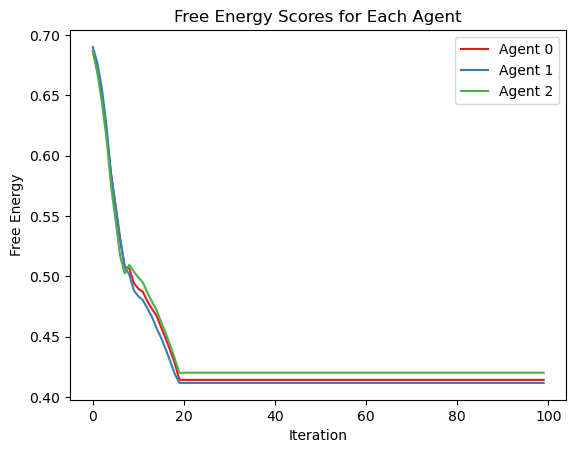

In [45]:
energy_results = aif.parse_free_energy_scores(avg_nrg_over_time)
aif.plot_energy(energy_results, num_agents)

In [8]:
# Calculate distance to final goals
final_distances = np.zeros((num_agents, goals.shape[0]))
for i in range(num_agents):
    for j in range(goals.shape[0]):
        final_distances[i,j] = np.linalg.norm(final_positions[i,:2] - goals[j,:])
print("Final distances: ", final_distances)


Final distances:  [[10.4605414   1.16716409]
 [10.45314845  0.79625775]
 [ 9.75305354  0.48351174]]


In [184]:
# Scratch code for testing

goals = np.array([[0,-1],[0.,5.]])
my_position = np.array([0.,0.])



goal_azimuth = np.arctan2(goal[1] - my_position[1], goal[0] - my_position[0])
relative_azimuth = np.arctan2(my_position[1] - object_position[1], my_position[0] - object_position[0])

print("Goal Azimuth: ", goal_azimuth)
print("Relative Azimuth: ", relative_azimuth)
np.arctan2(1,0)

Goal Azimuth:  1.5707963267948966
Relative Azimuth:  1.5707963267948966


1.5707963267948966